In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from minepy import MINE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_california_housing
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, LassoLarsIC, LassoLarsCV
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../../data/tidy/data-aggregation.csv', index_col=[0])

In [3]:
df.head()

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,fueloil_gal,vmt,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh,cf_phh,hh_2014,cf
msa,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,220.478974,192265.733198,15.657754,13.480262,7.577231,4.540864,4.916275,46.172386,100690.0,4.649098e+06
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,124.833129,115371.753755,15.995618,12.539551,7.604762,5.563126,6.291286,47.994344,227621.0,1.181086e+07
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,45.432009,115472.584515,13.906133,14.077966,7.783972,4.548862,4.895082,45.212014,54985.0,2.485983e+06
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,1181.765702,125086.186971,14.217611,10.902159,7.202424,5.309082,6.006795,43.638071,407208.0,1.776977e+07
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,4.024810,101942.760602,15.594705,13.531895,7.775563,5.051710,5.576700,47.530572,305713.0,1.453071e+07


In [9]:
len(df.columns)

47

In [39]:
cfdf = df.iloc[:,39:44]
cfdf

,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh
msa,,,,,
"Abilene, TX",15.657754,13.480262,7.577231,4.540864,4.916275
"Akron, OH",15.995618,12.539551,7.604762,5.563126,6.291286
"Albany, GA",13.906133,14.077966,7.783972,4.548862,4.895082
"Albany-Schenectady-Troy, NY",14.217611,10.902159,7.202424,5.309082,6.006795
"Albuquerque, NM",15.594705,13.531895,7.775563,5.051710,5.576700
...,...,...,...,...,...
"Yakima, WA",16.793236,10.812623,9.075718,4.896841,5.181530
"York-Hanover, PA",17.381967,14.652270,7.845891,5.509122,6.182997
"Youngstown-Warren-Boardman, OH-PA",15.029578,16.187622,7.522046,5.311130,5.963216


In [55]:
cf = cfdf.multiply(df['hh_2014'], axis="index")/1e6

In [64]:
cfct = cf.loc[["New Haven-Milford, CT", "Norwich-New London, CT", "Worcester, MA-CT"]]
cfct.columns = ['Transport','Housing','Food','Goods','Services']

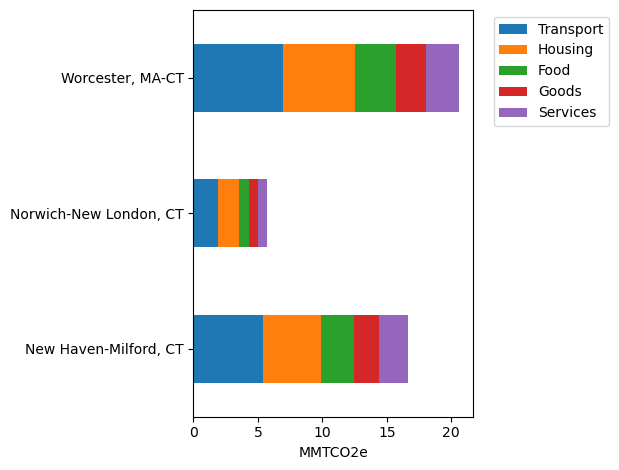

<Figure size 4000x500 with 0 Axes>

In [106]:
fig, ax = plt.subplots()
plt.figure(figsize=(40,5))
cfct.plot(kind='barh', stacked=True, ax=ax)
#plt.grid('True',zorder=-50)
ax.set_xlabel('MMTCO2e')
ax.set_ylabel('')
ax.legend(bbox_to_anchor=(1.05,1))
fig.tight_layout()
fig.savefig('../../figures/cf_ct_msa.png',dpi=300)